In [80]:
### Import libraries
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches # needed for waffle Charts
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import random
import math
import time
import datetime
from PIL import Image # converting images into arrays
import matplotlib.patches as mpatches # needed for waffle Charts
import folium # to create maps
from pylab import *
%matplotlib inline
import warnings
mpl.style.use('seaborn') # optional: for ggplot-like style
warnings.filterwarnings("ignore")

# Dataset

This data is collected from repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).https://github.com/CSSEGISandData/COVID-19

In [81]:
### Select yesterday date as report provide figures for the day before
from datetime import date, timedelta
file_date = str((date.today() - timedelta(days = 1)).strftime('%m-%d-%Y'))
### Select data path
github_dir_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file_path = github_dir_path  + file_date + '.csv'
### Import data
df = pd.read_csv(file_path, error_bad_lines=False)

In [82]:
# view the dataframe
df.head()

FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-04-19 23:41:01   
1  22001.0     Acadia       Louisiana             US  2020-04-19 23:41:01   
2  51001.0   Accomack        Virginia             US  2020-04-19 23:41:01   
3  16001.0        Ada           Idaho             US  2020-04-19 23:41:01   
4  19001.0      Adair            Iowa             US  2020-04-19 23:41:01   

         Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334  -82.461707         17       0          0      17   
1  30.295065  -92.414197        110       7          0     103   
2  37.767072  -75.632346         42       0          0      42   
3  43.452658 -116.241552        598      10          0     588   
4  41.330756  -94.471059          1       0          0       1   

                    Combined_Key  
0  Abbeville, South Carolina, US  
1          Acadia, Louisiana, US  
2         Accomack, Virginia, US  
3                 Ada, Idaho, US  
4                Adair, Iowa, US

In [83]:
# Countries affected
countries = df['Country_Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  185
['US', 'Canada', 'United Kingdom', 'China', 'Netherlands', 'Australia', 'Denmark', 'France', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Ha

In [84]:
print ('data dimensions:', df.shape)

data dimensions: (3072, 12)


In [85]:
### Check if the dataframe contains NaN values
df.isna().any()

FIPS               True
Admin2             True
Province_State     True
Country_Region    False
Last_Update       False
Lat                True
Long_              True
Confirmed         False
Deaths            False
Recovered         False
Active            False
Combined_Key      False
dtype: bool

In [86]:
### Replace NaN values by 0
df.fillna(0, inplace=True)
# Remove columns
df_countries = df.drop(['FIPS','Lat','Long_','Admin2','Province_State','Last_Update','Combined_Key'], axis=1)
# Rename the columns so that they make sense
df_countries.rename (columns = {'Country_Region':'Country'}, inplace = True)
# Re-order Columns
df_countries = df_countries[['Country','Confirmed','Active','Recovered','Deaths']]
# Group datas by Country
df_countries_grouped=df_countries.groupby('Country').sum()
# Set the country name as index
df_countries.set_index('Country', inplace=True)

In [87]:
print ('data dimensions:', df_countries_grouped.shape)

data dimensions: (185, 4)


In [88]:
# view the final dataframe
df_countries_grouped.head()

Confirmed  Active  Recovered  Deaths
Country                                          
Afghanistan        996     832        131      33
Albania            562     222        314      26
Algeria           2629    1207       1047     375
Andorra            713     442        235      36
Angola              24      16          6       2

In [89]:
# plotting configurations
%config InlineBackend.figure_format = 'retina'
plt.rc('figure', dpi=300)
plt.rc('savefig', dpi=300)
fig_size = (12,6)
big_fig_size = (18,8)

In [90]:
fig = px.treemap(df.sort_values(by='Confirmed', ascending=False).reset_index(drop=True), 
                 path=["Country_Region"], values="Confirmed", 
                 title='Number of Confirmed Cases',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.show()

In [91]:
fig = px.treemap(df.sort_values(by='Active', ascending=False).reset_index(drop=True), 
                 path=["Country_Region"], values="Active", 
                 title='Number of Active Cases',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.show()

In [92]:
fig = px.treemap(df.sort_values(by='Recovered', ascending=False).reset_index(drop=True), 
                 path=["Country_Region"], values="Recovered", 
                 title='Number of Recovered Cases',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.show()

In [93]:
fig = px.treemap(df.sort_values(by='Deaths', ascending=False).reset_index(drop=True), 
                 path=["Country_Region"], values="Deaths", 
                 title='Number of Deaths Cases',
                 color_discrete_sequence = px.colors.qualitative.Prism)
fig.show()

In [94]:
world_cases = []
total_active = []
total_recovered = [] 
total_deaths = [] 
recovery_rate = [] 
mortality_rate = []

confirmed_sum = df.Confirmed.sum()
active_sum=df.Active.sum()
recovered_sum = df.Recovered.sum()
death_sum = df.Deaths.sum()
world_cases.append(confirmed_sum)
total_active.append(active_sum)
total_recovered.append(recovered_sum)
total_deaths.append(death_sum)
recovery_rate.append(recovered_sum/confirmed_sum)
mortality_rate.append(death_sum/confirmed_sum)
mean_mortality_rate = np.mean(mortality_rate)
mean_recovery_rate = np.mean(recovery_rate)

In [95]:
print ('Total Confirmed Cases= '+ str(confirmed_sum))
print ('Total Active Cases= '+ str(active_sum))
print ('Total Recovered Cases= '+ str(recovered_sum))
print ('Total Deaths Cases= '+ str(death_sum))
print ('Total Recovery Rate(%)= '+ str(mean_recovery_rate*100))
print ('Total Fatality Rate(%)= '+ str(mean_mortality_rate*100))

Total Confirmed Cases= 2401379
Total Active Cases= 1612432
Total Recovered Cases= 623903
Total Deaths Cases= 165044
Total Recovery Rate(%)= 25.981030066474304
Total Fatality Rate(%)= 6.872884288569193


In [96]:
### Show Countries with most Active cases
df_countries_grouped = df_countries_grouped.sort_values('Confirmed', ascending=False)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

In [97]:
### Show Countries with most Active cases
df_countries_grouped = df_countries_grouped.sort_values('Active', ascending=False)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

In [98]:
### Show Countries with most Recovered cases
df_countries_grouped = df_countries_grouped.sort_values('Recovered', ascending=False)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

In [99]:
### Show Countries with most Deaths cases
df_countries_grouped = df_countries_grouped.sort_values('Deaths', ascending=False)
df_countries_grouped.head(10).style.background_gradient(cmap='Blues')

In [115]:
### Show Countries with no Deaths cases
df_countries_grouped = df_countries_grouped.sort_values('Deaths', ascending=False)
df_countries_grouped.tail(10).style.background_gradient(cmap='Blues')

In [114]:
### Show Countries with no Recovered cases
df_countries_grouped = df_countries_grouped.sort_values('Recovered', ascending=False)
df_countries_grouped.tail(10).style.background_gradient(cmap='Blues')

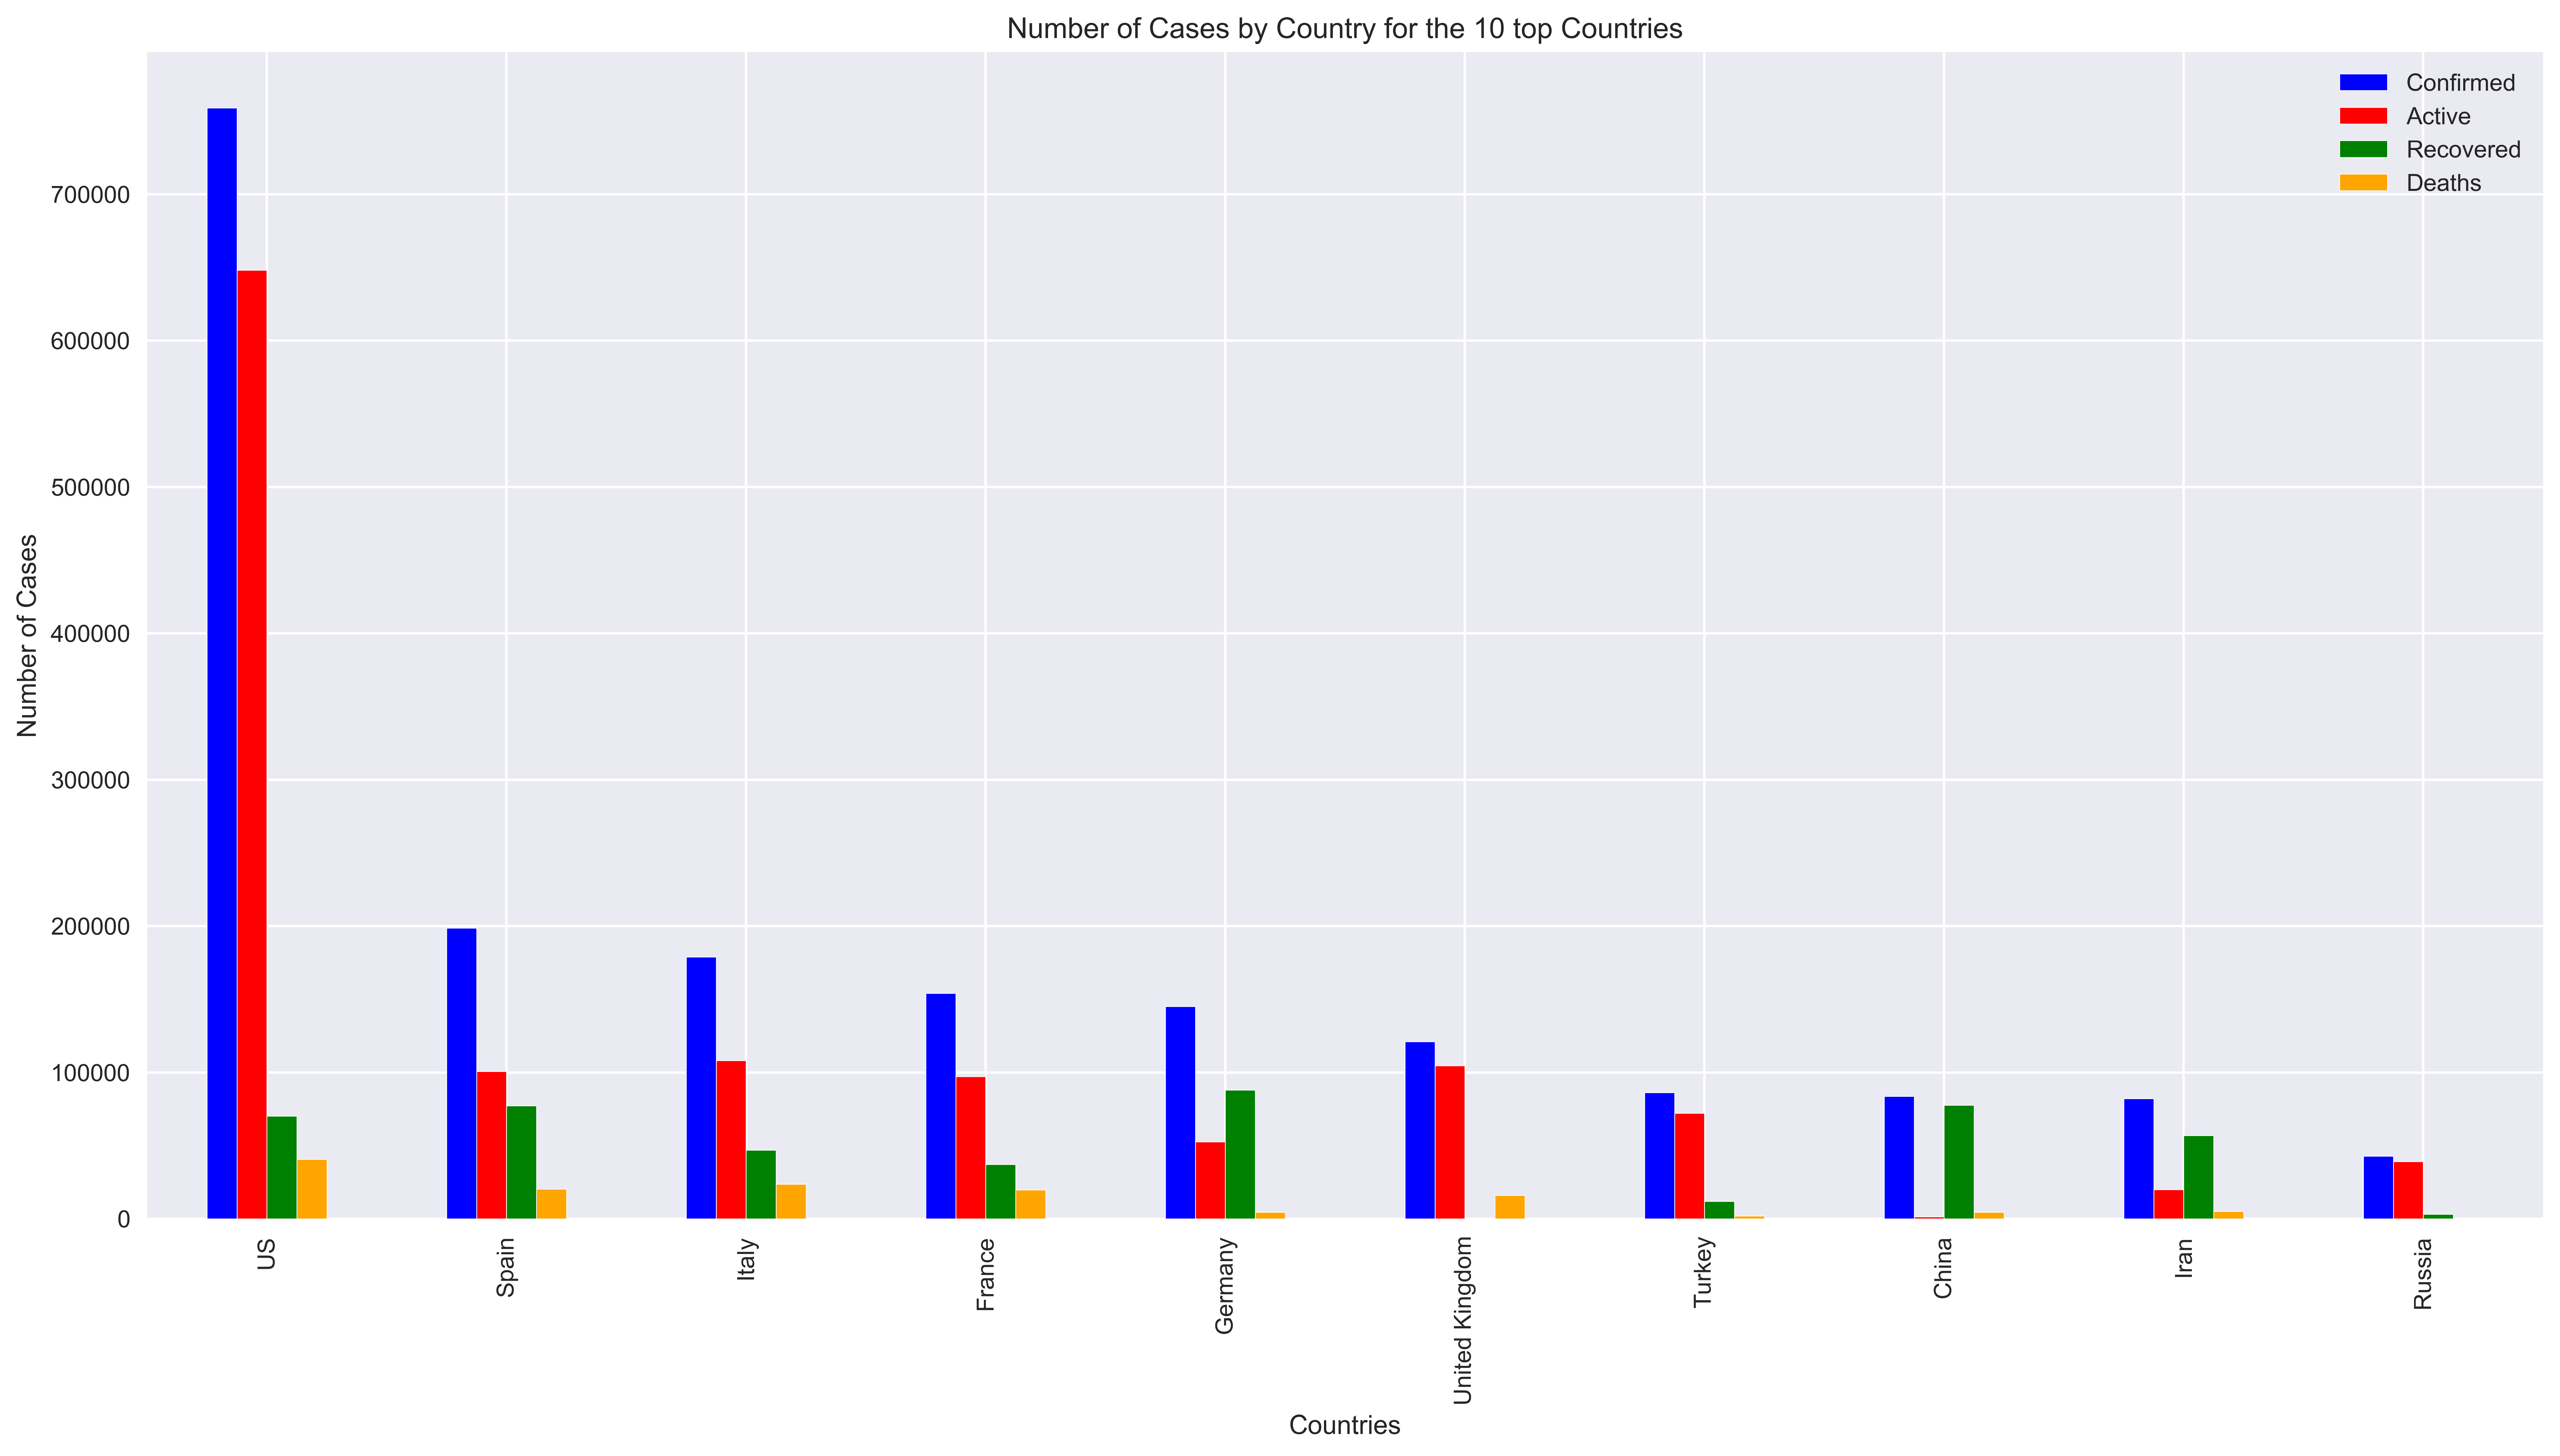

In [102]:
### Sort the top countries by Confirmed cases
df_countries_grouped.sort_values(['Confirmed'], ascending=False, axis=0, inplace=True)
# get the top entries
df_countries_top = df_countries_grouped.head(10)
### Show Unstacked Histogram
df_countries_top.plot(kind='bar', figsize=(18, 9), stacked=False, 
            color=['blue', 'red', 'green', 'orange'])
plt.title('Number of Cases by Country for the 10 top Countries')
plt.ylabel('Number of Cases')
plt.xlabel('Countries')
plt.show()

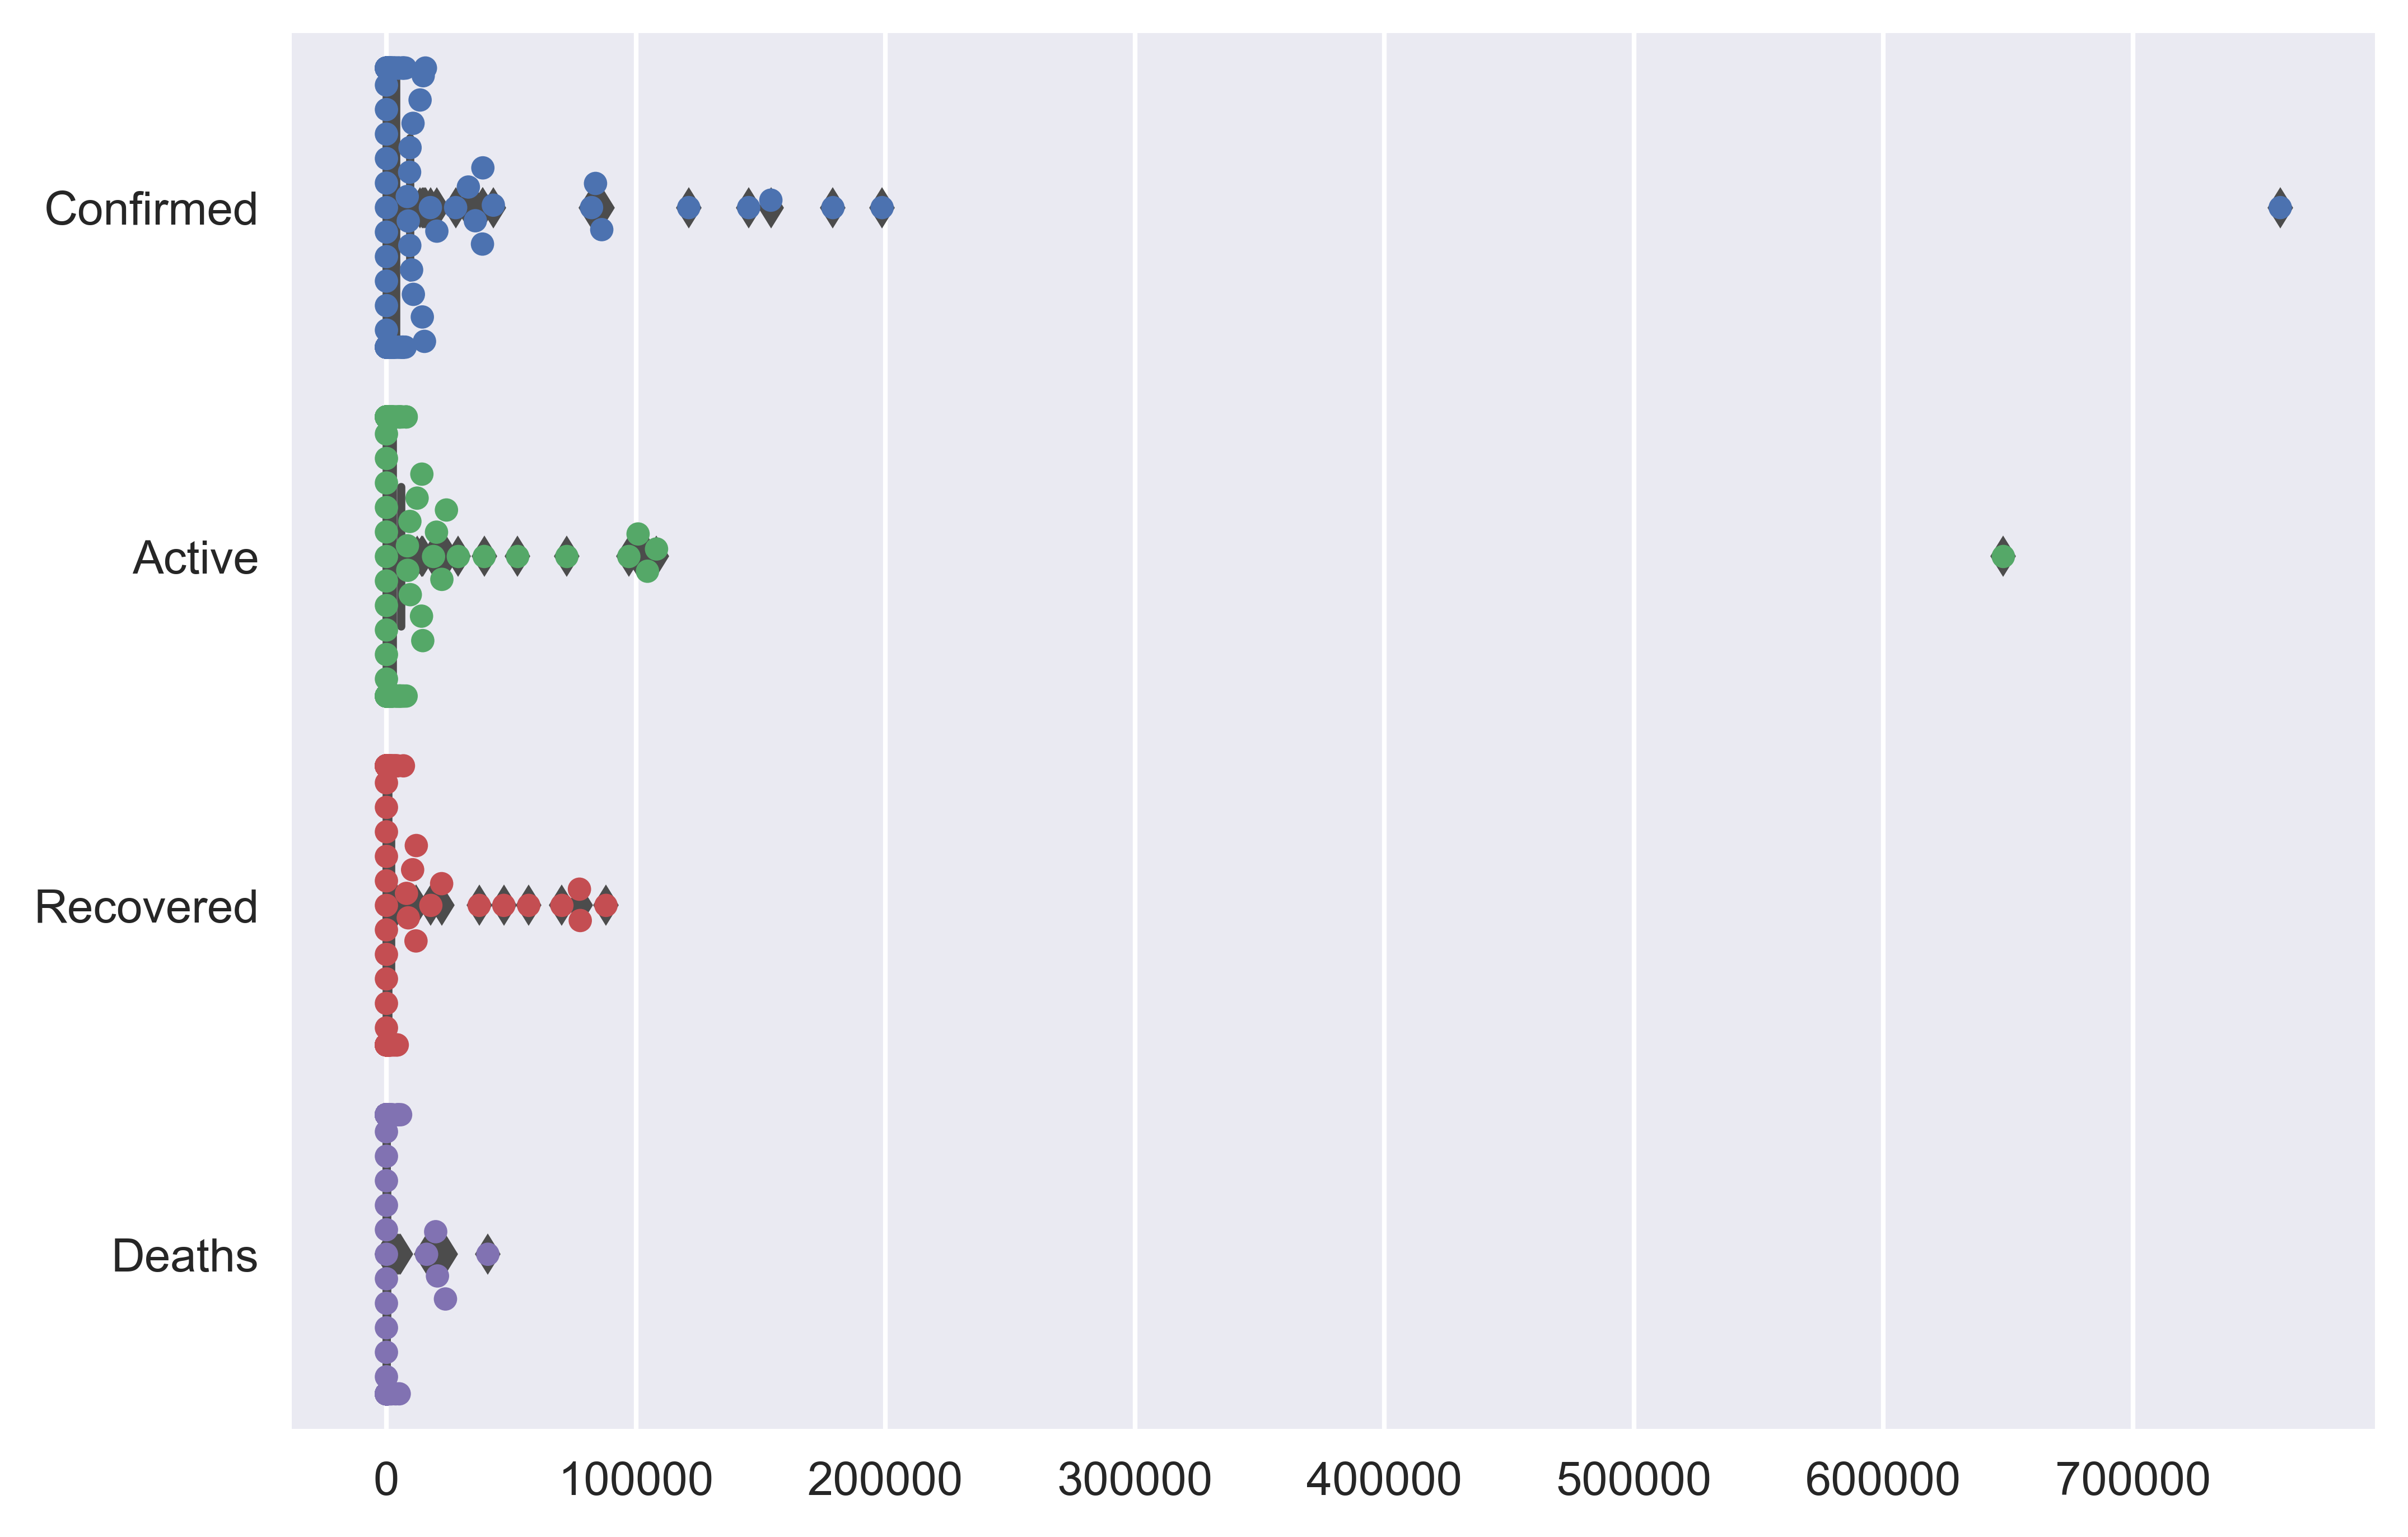

In [103]:
ax = sns.boxplot(data=df_countries_grouped, orient="h")
ax = sns.swarmplot(data=df_countries_grouped, orient="h")

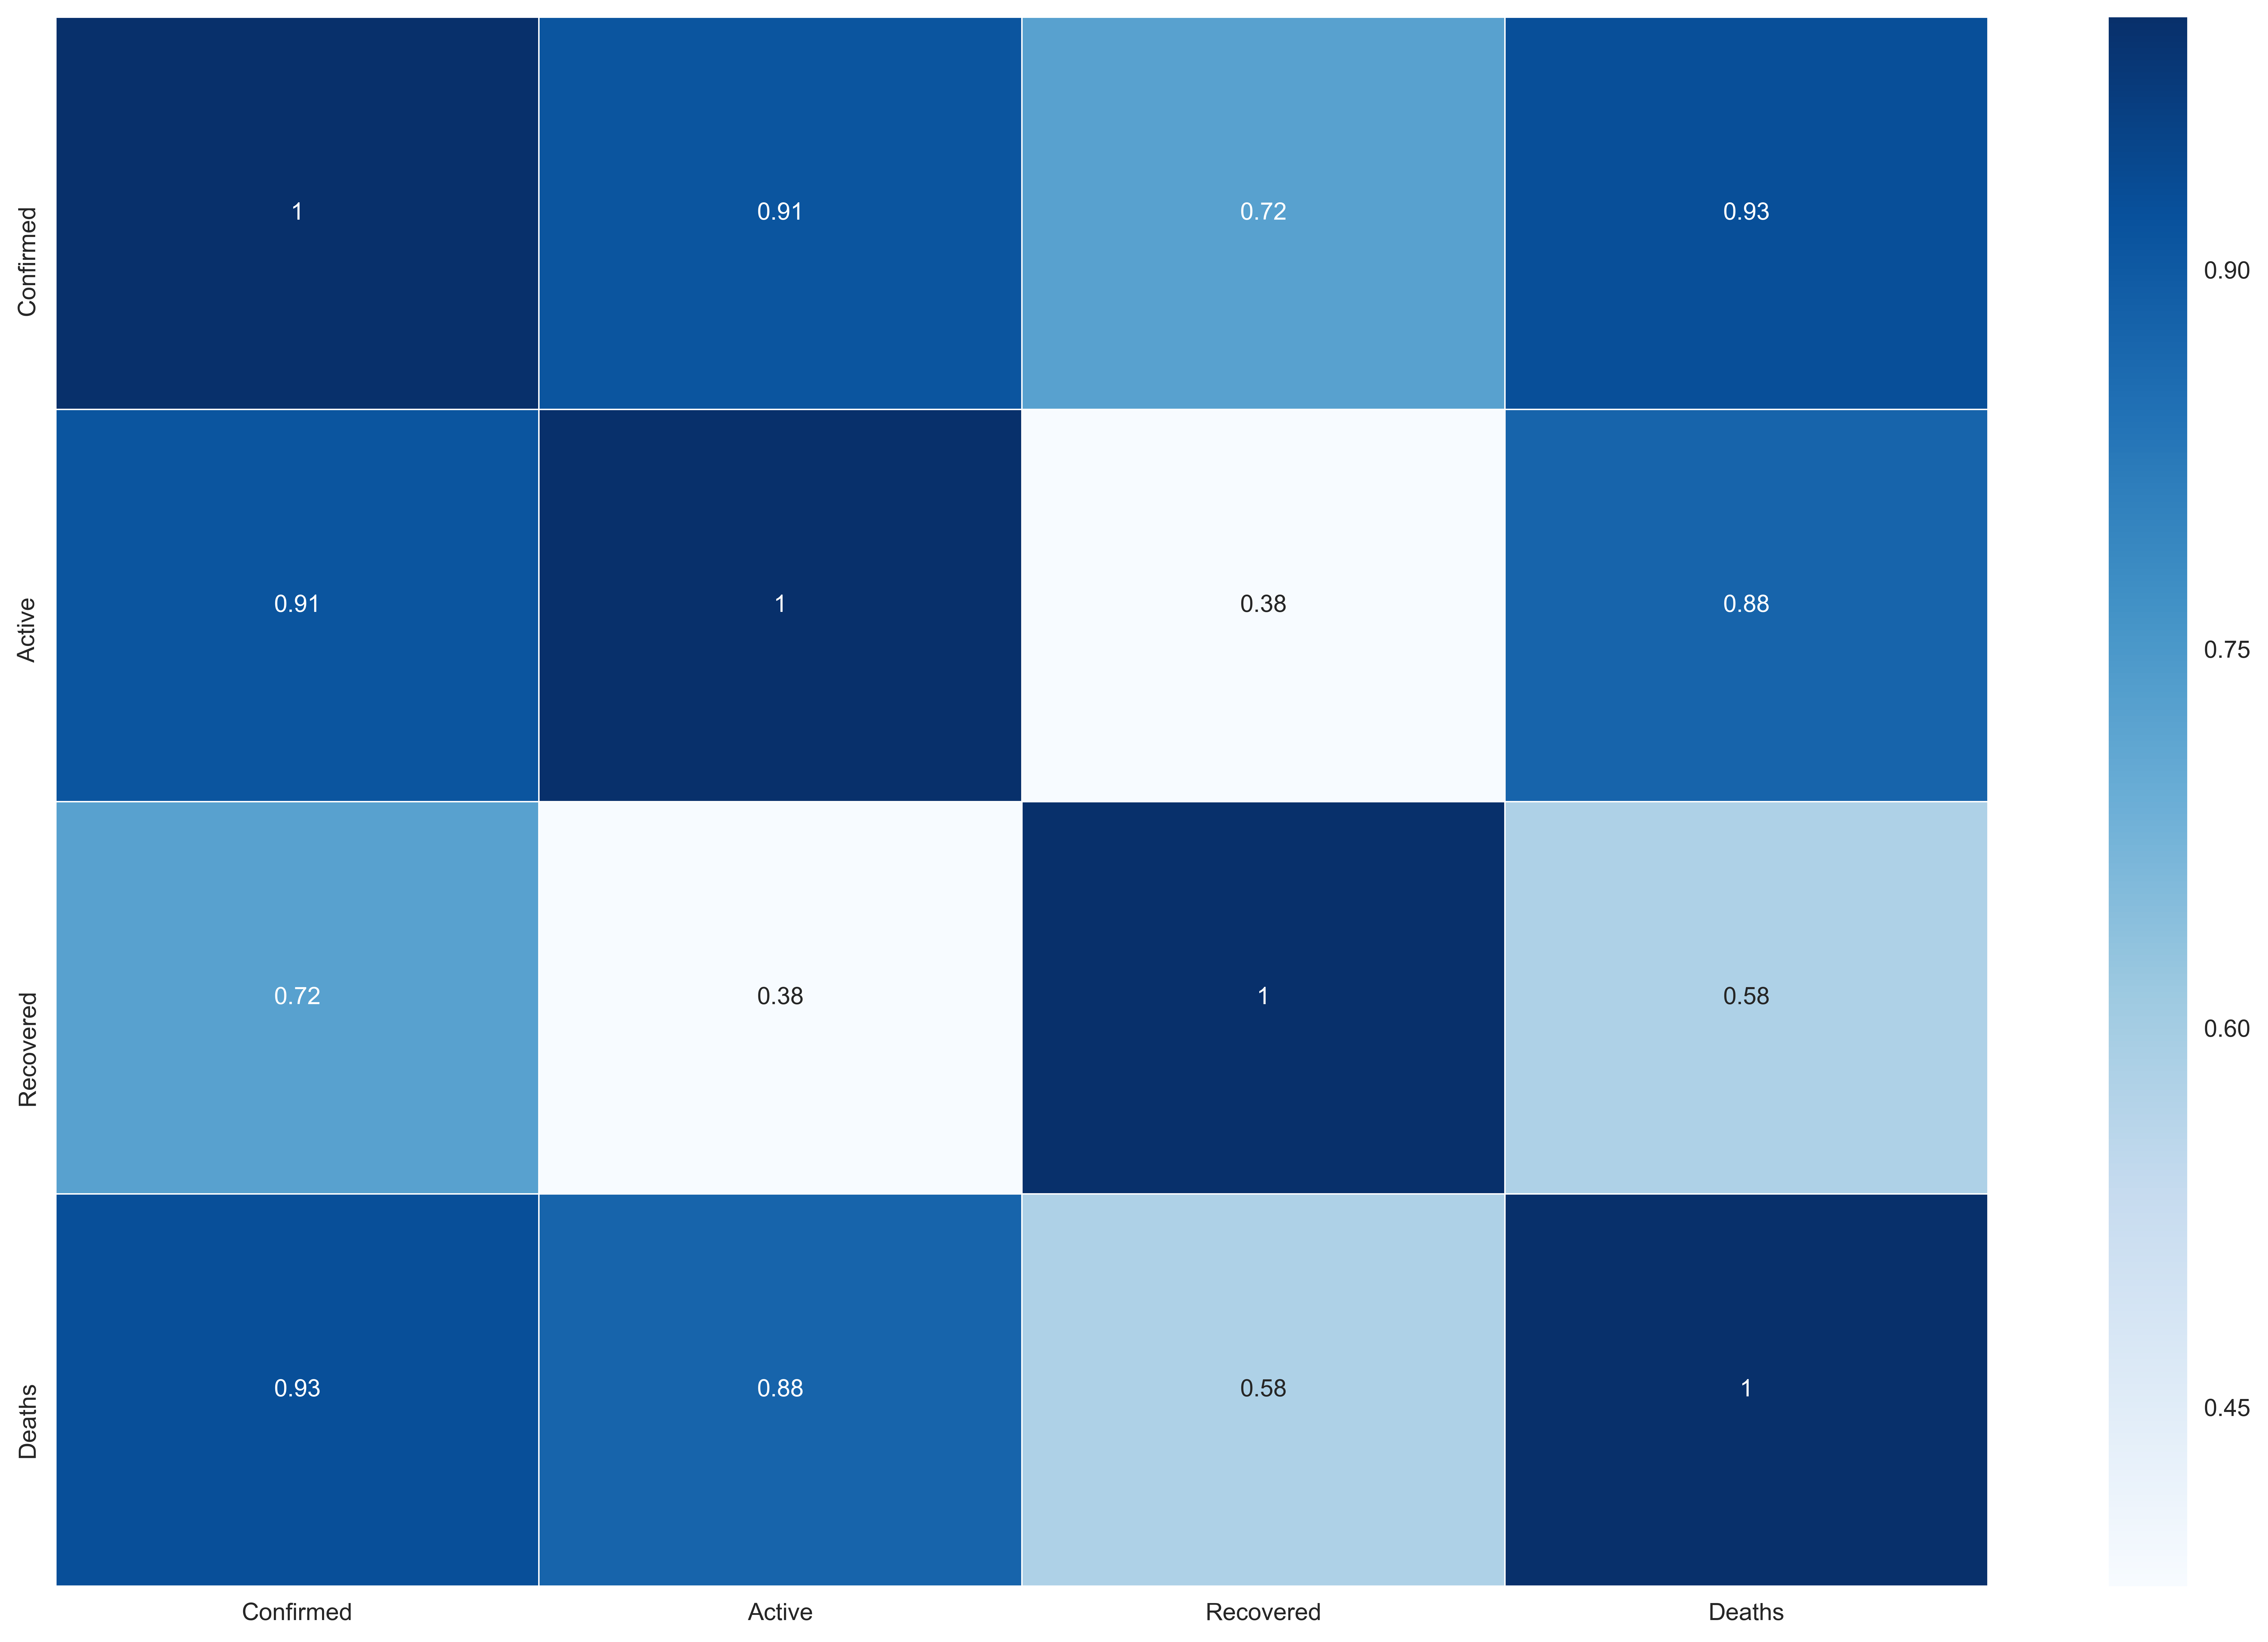

In [104]:
### Show heatmap Correlation 
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_countries.corr(), annot=True, linewidths=.5, cmap="Blues")

In [105]:
sns.pairplot(df_countries_grouped[['Confirmed','Deaths','Recovered','Active']], diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, palette="husl",
             size = 4);

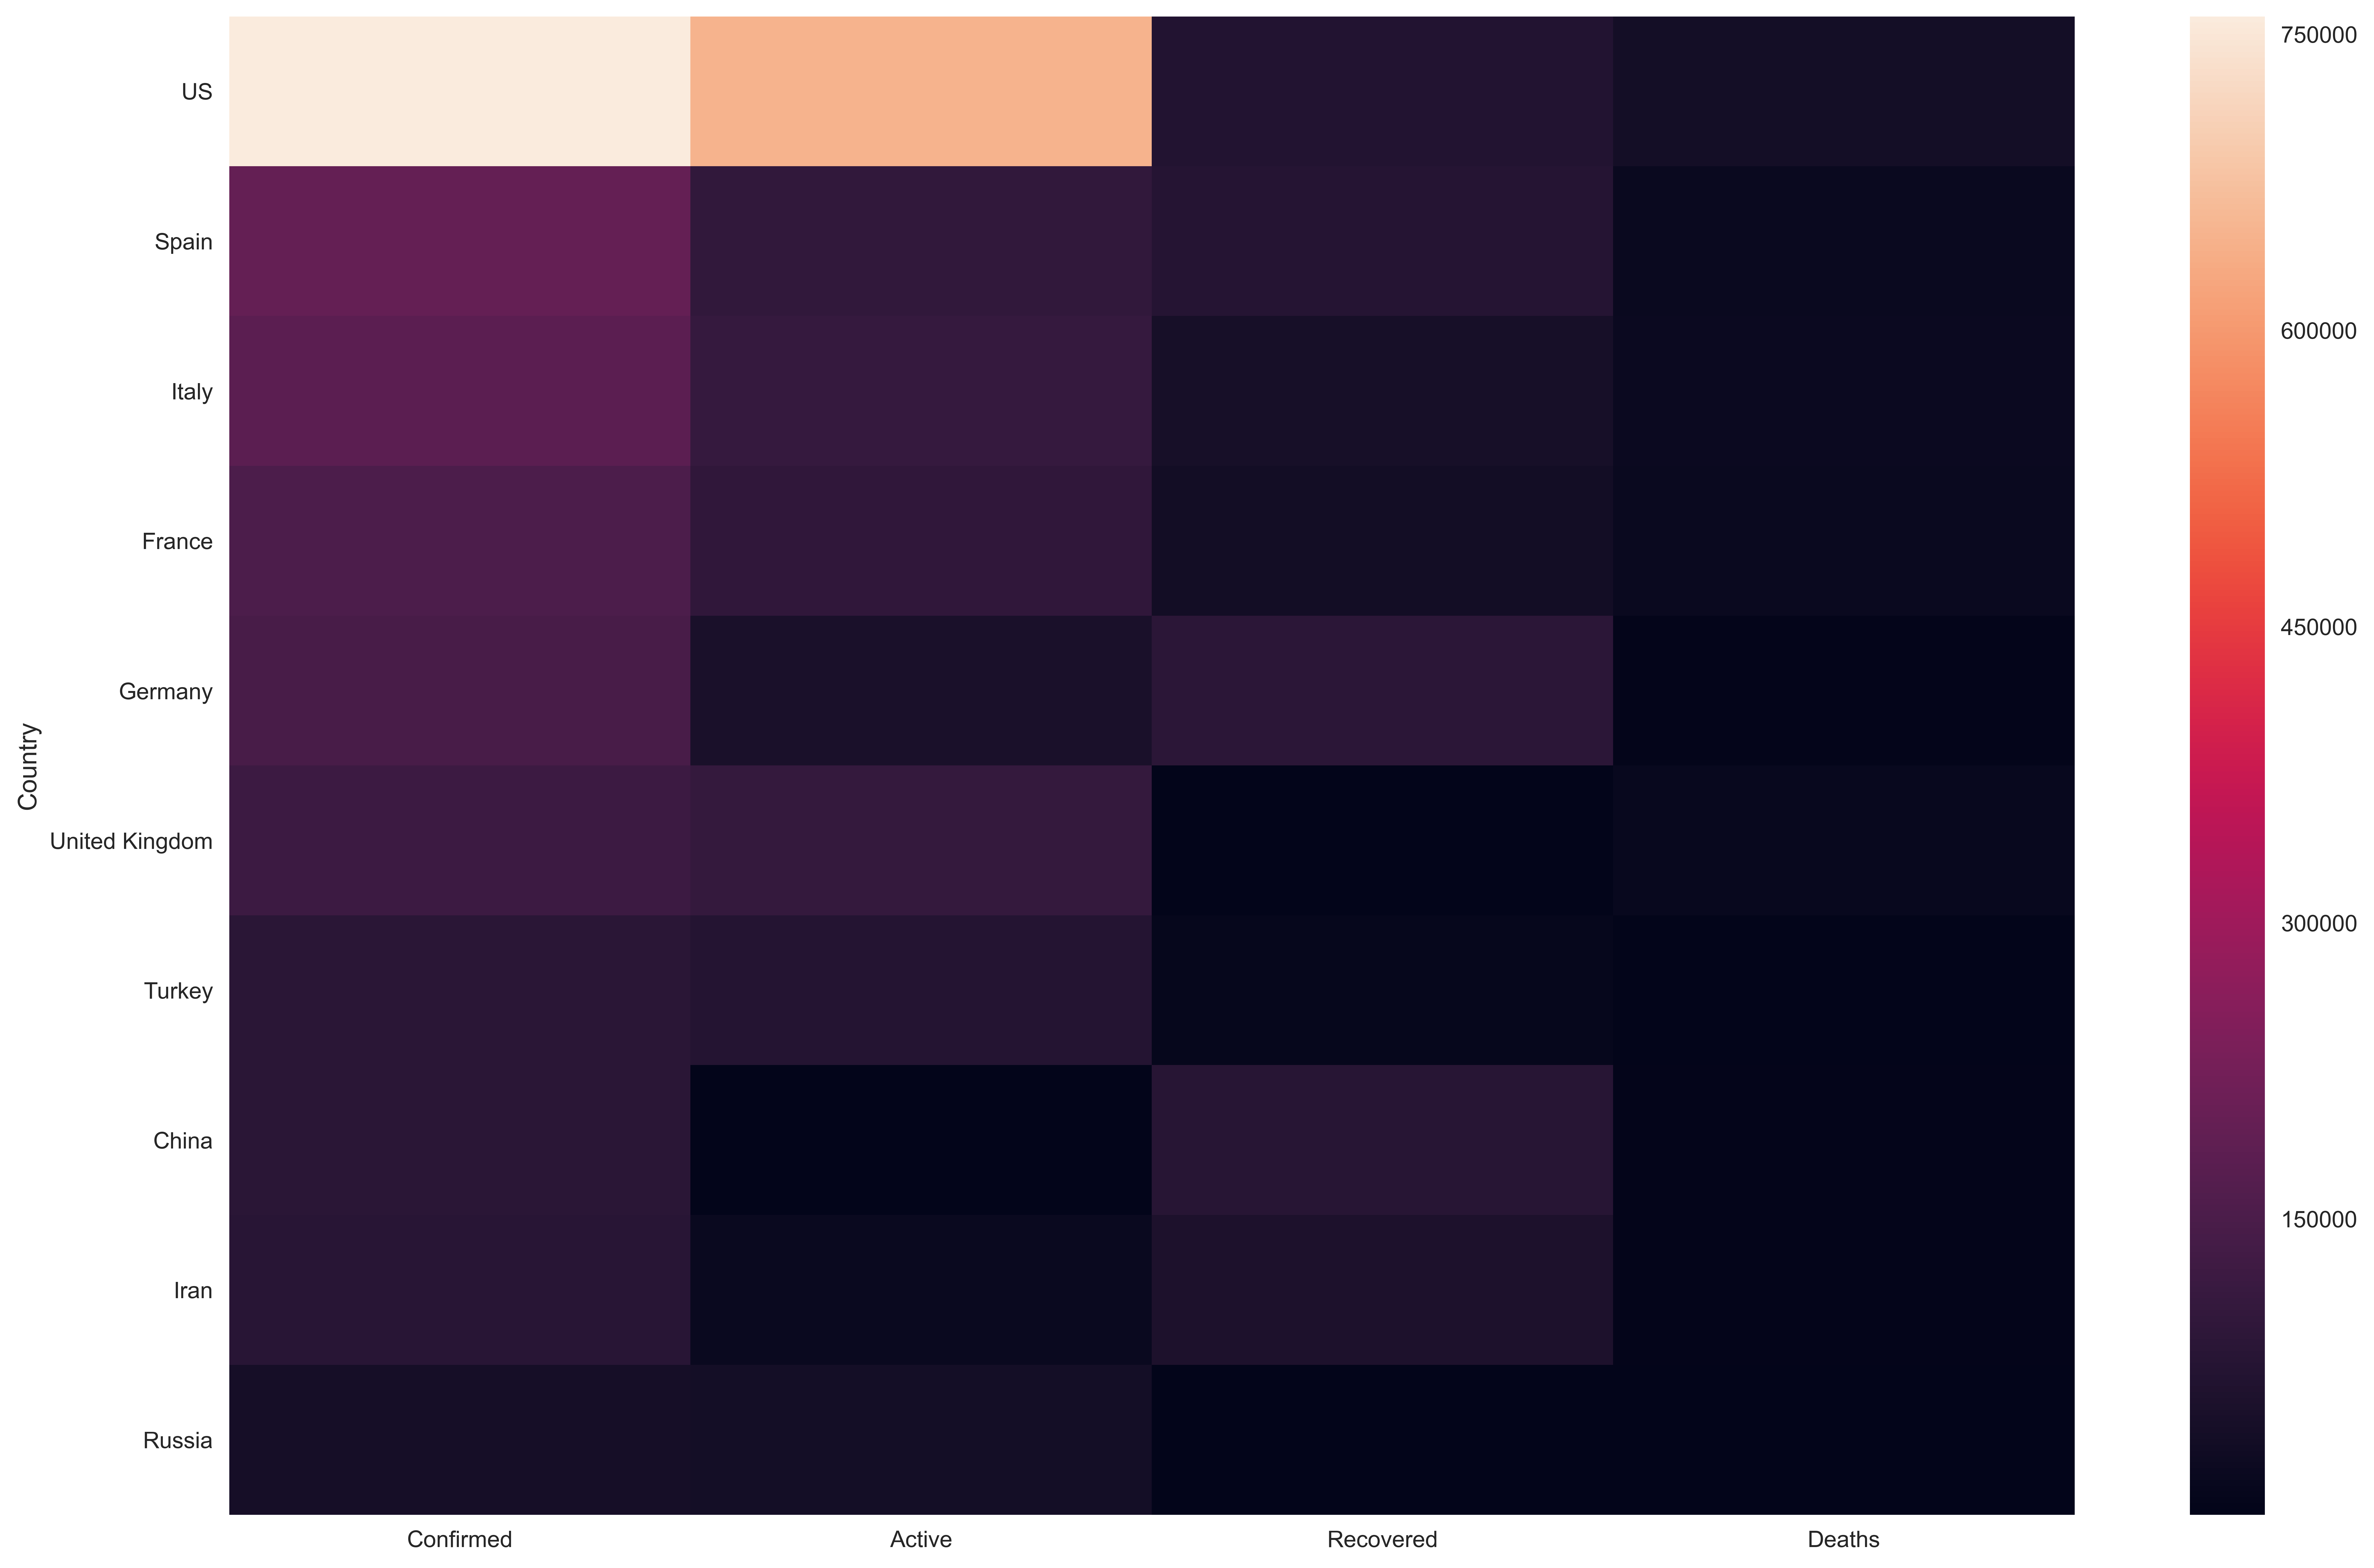

In [106]:
### Show heatmap
sns.set_style("darkgrid")
ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df_countries_top)

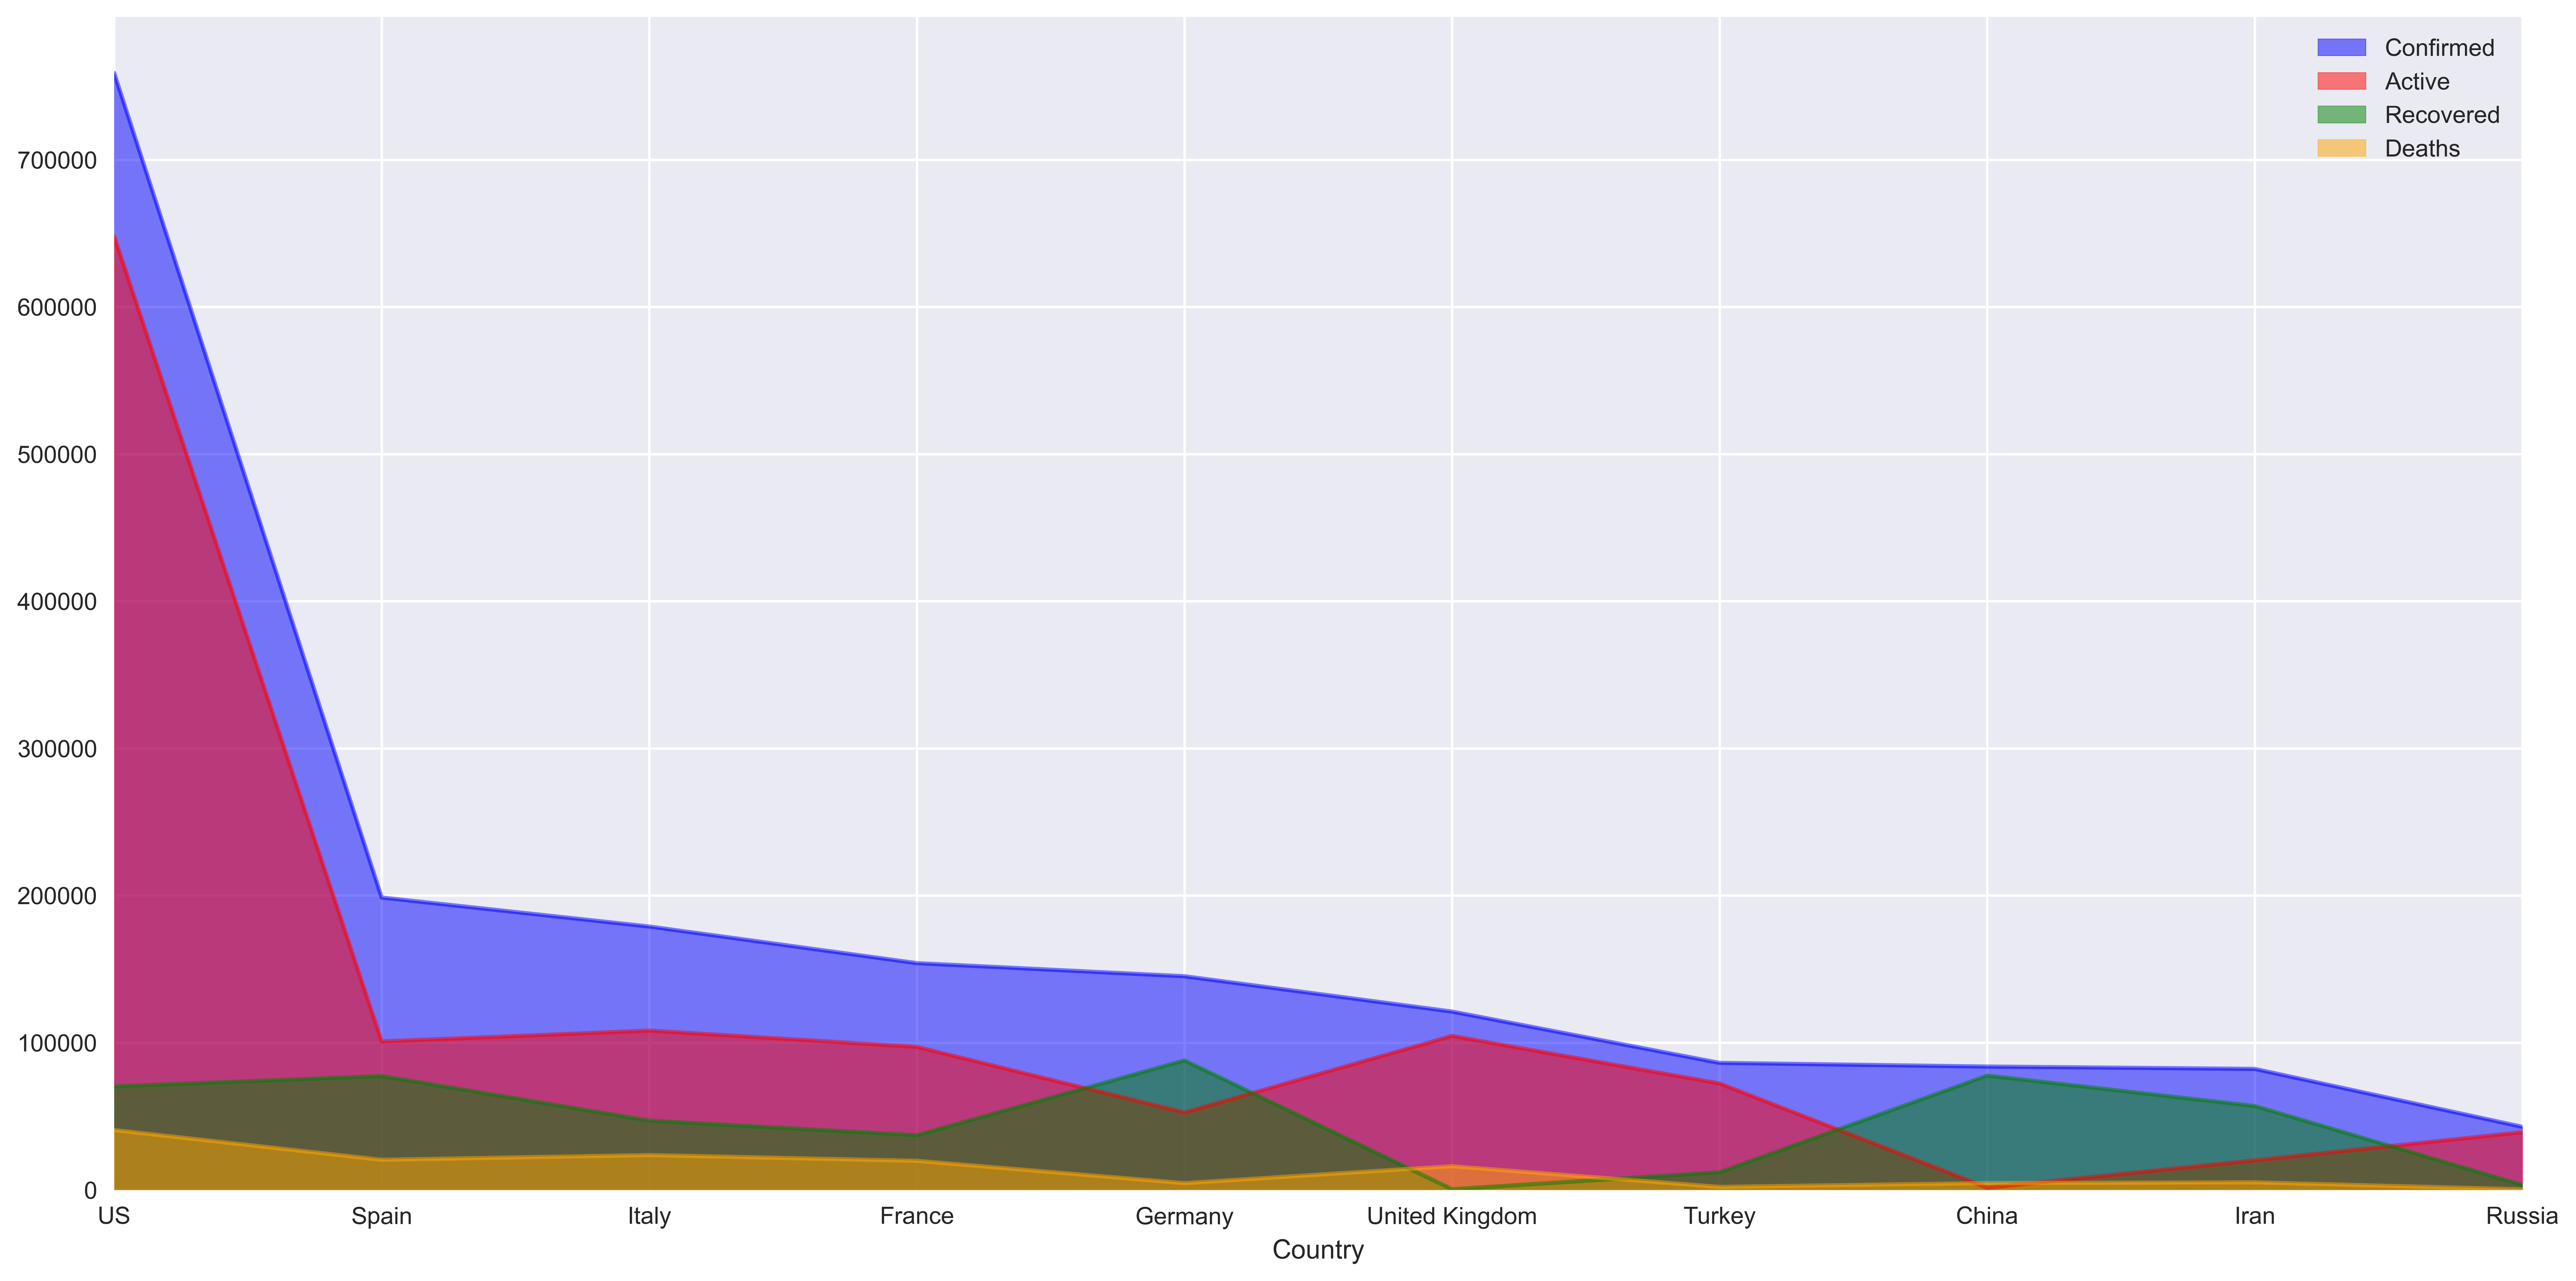

In [107]:
# Line plot top 8 countries
df_countries_top.plot(kind='area', figsize=(18, 9),stacked=False, 
            color=['blue', 'red', 'green', 'orange']) 
plt.show()

In [108]:
df_countries_top = df_countries_top.reset_index()

In [109]:
sns.pairplot(df_countries_top, 
             vars = ['Confirmed', 'Active', 'Recovered', 'Deaths'], 
             hue = 'Country', diag_kind = 'kde', palette="husl",
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);

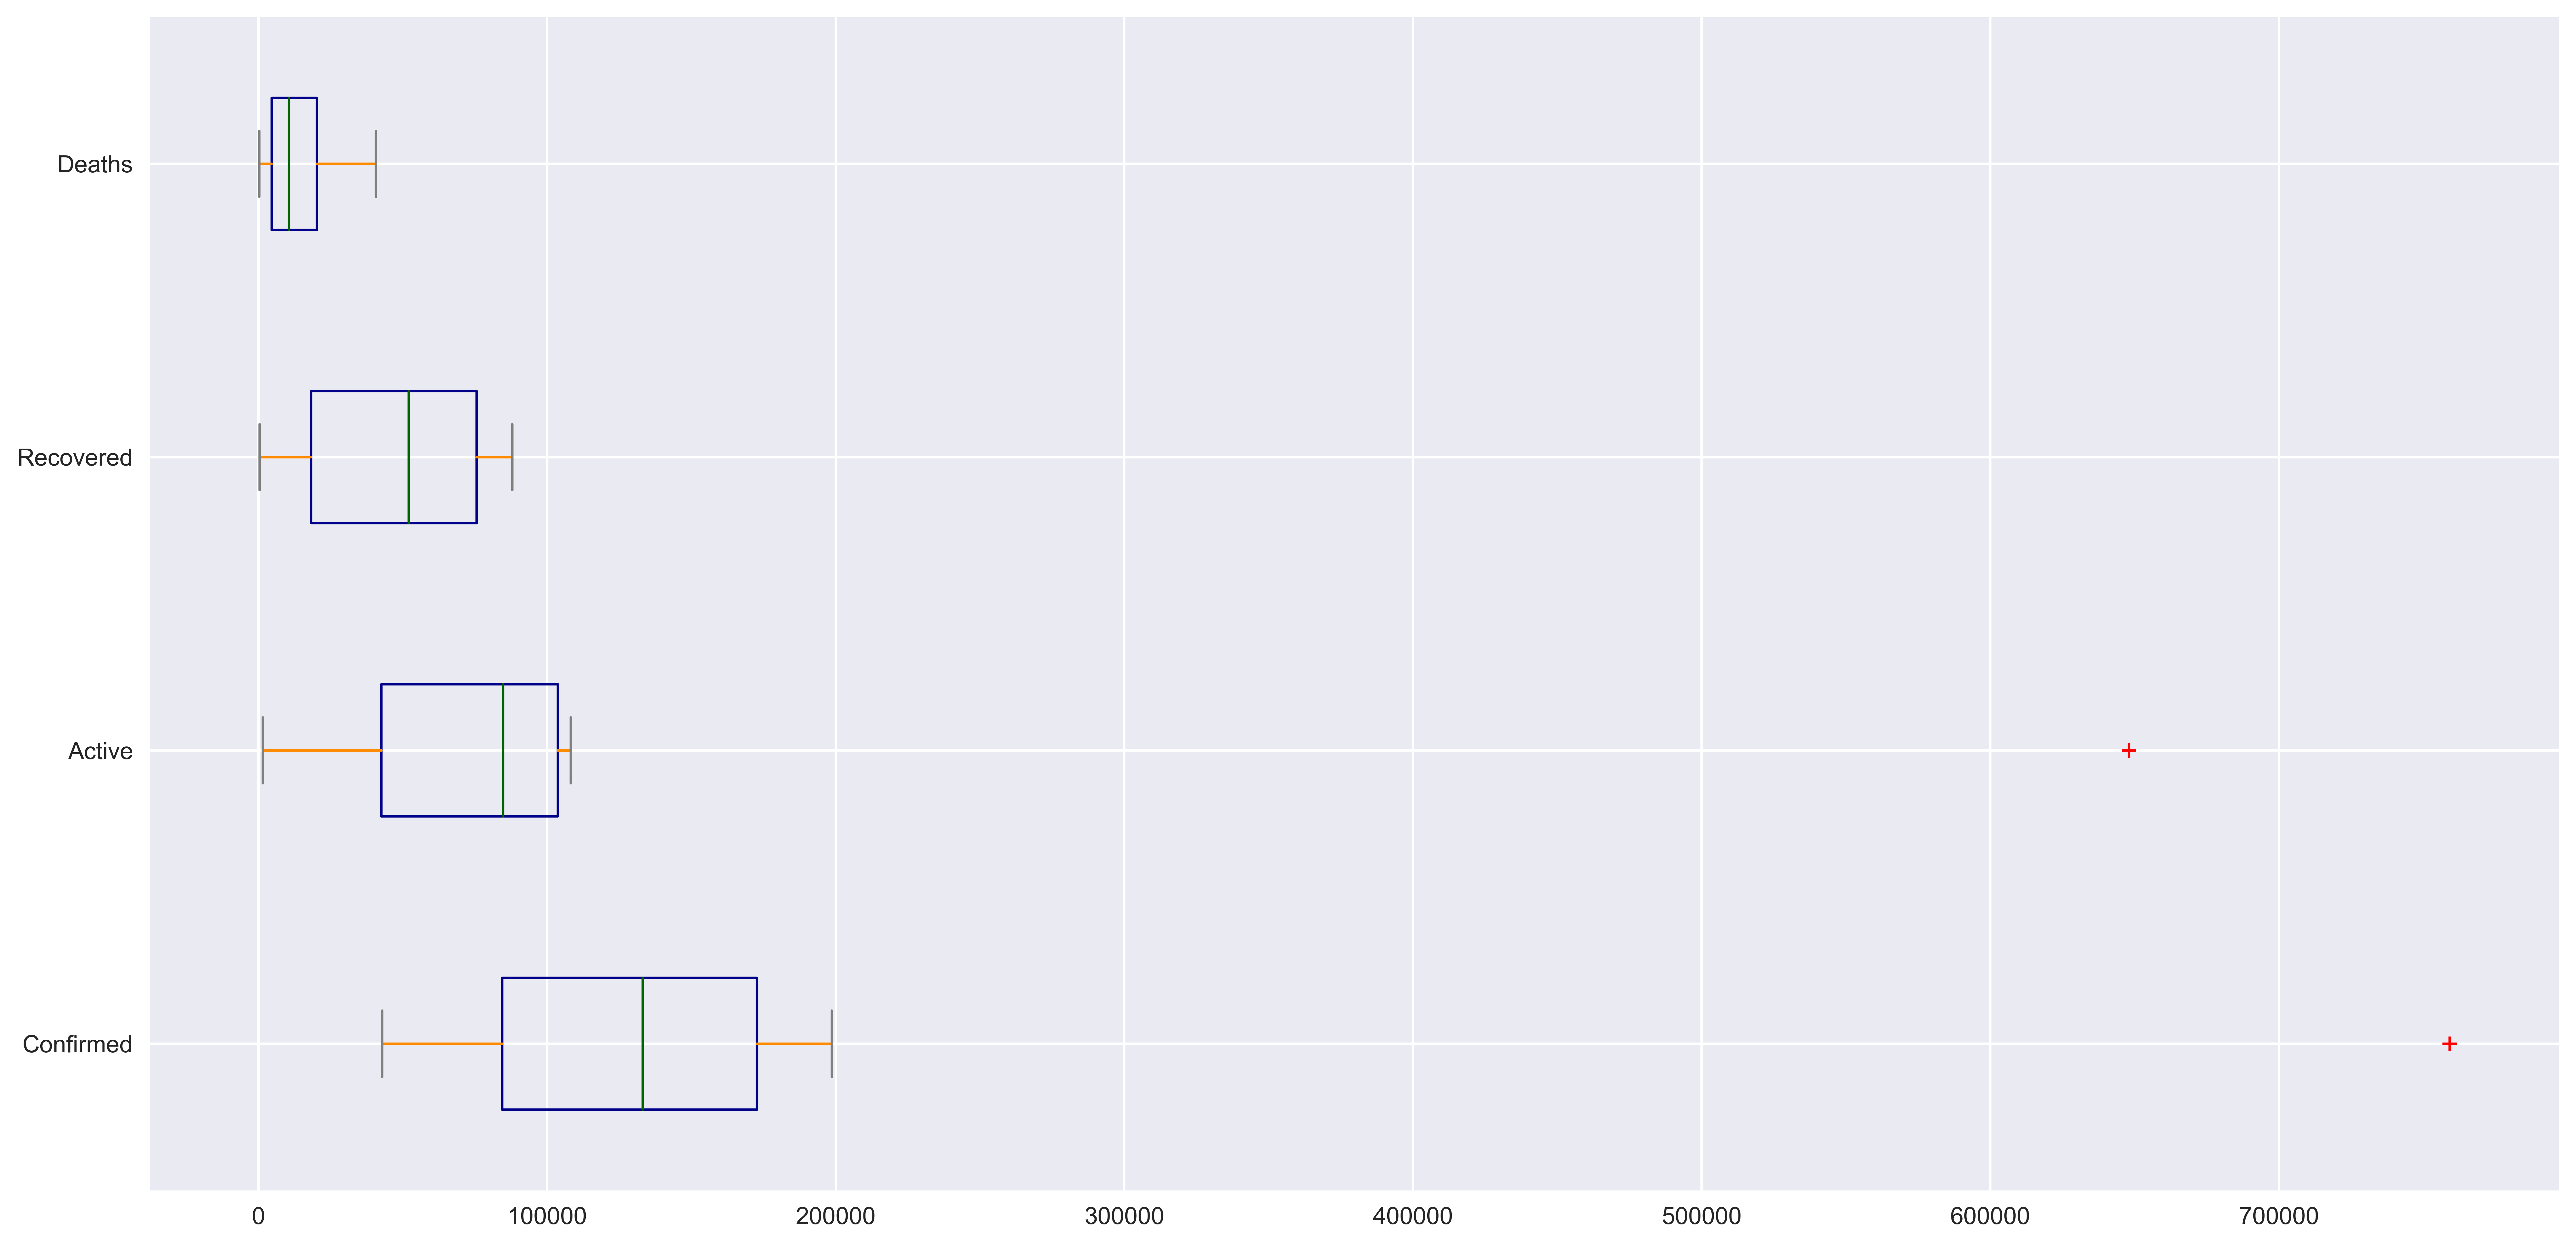

In [110]:
### Show Box plot
color = dict(boxes='DarkBlue', whiskers='DarkOrange',medians='DarkGreen', caps='Gray')
df_countries_top.plot(kind ='box',notch= False,
          color=color, sym='r+', vert=False ,patch_artist=False,
          figsize=(18, 9))
plt.title('')
plt.show()

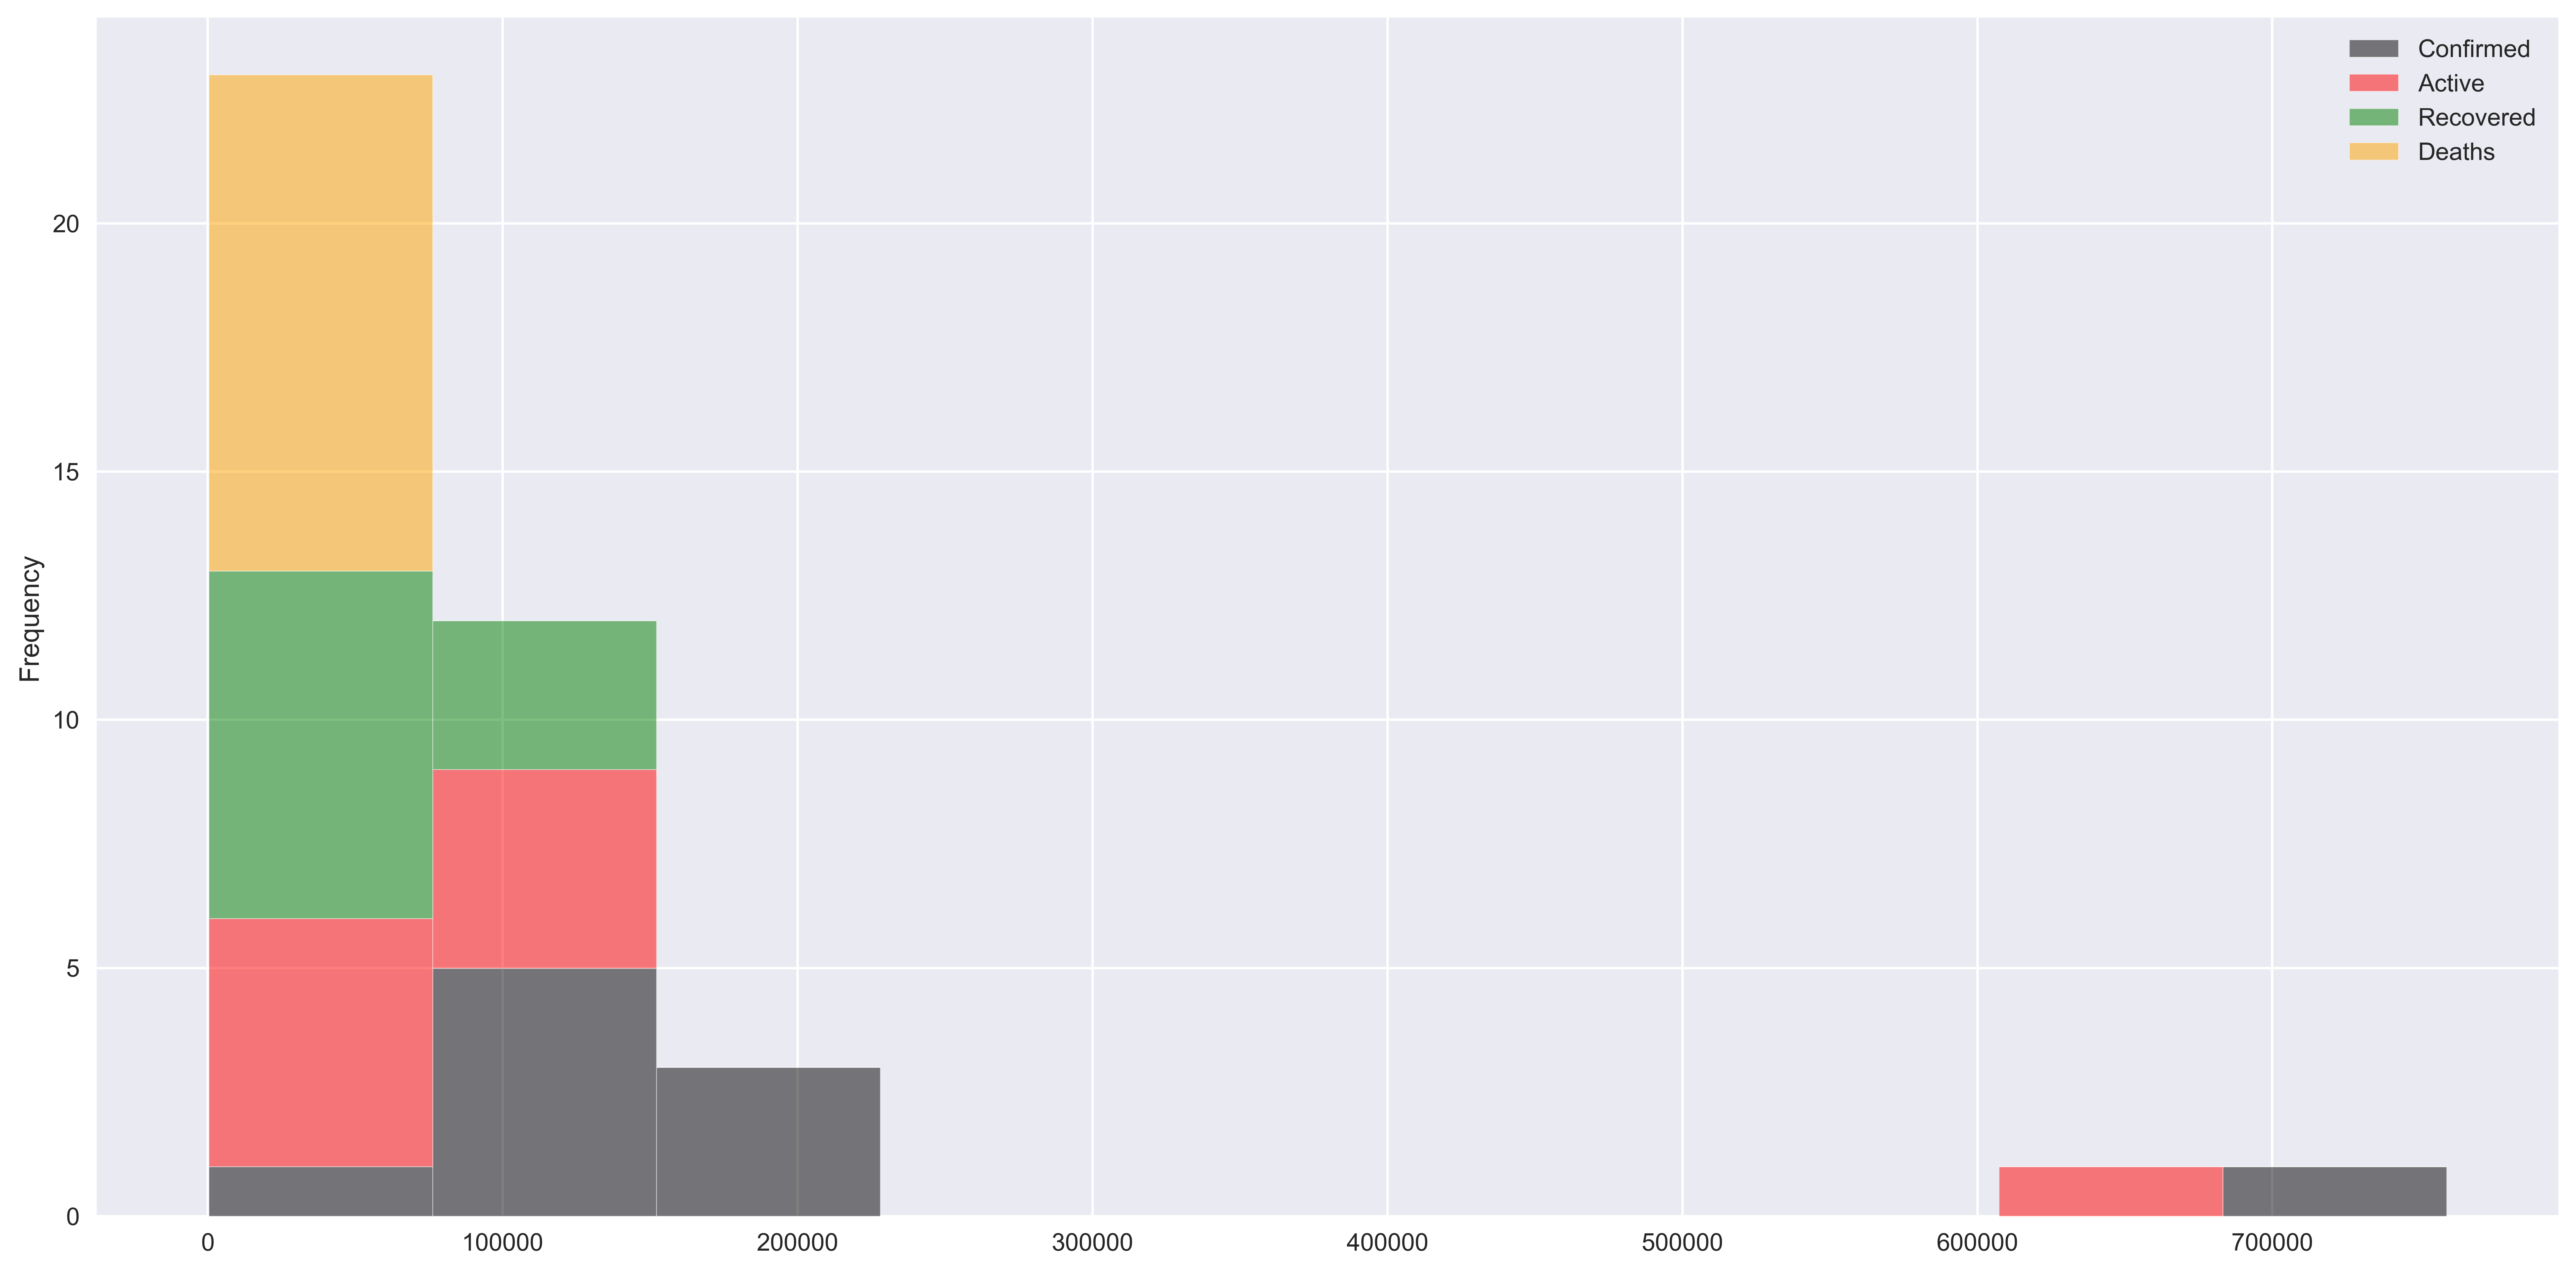

In [111]:
# Histogram plot top countries
df_countries_top.plot(kind='hist', figsize=(18, 9),stacked=True, 
             alpha=0.5,
            color=['black', 'red', 'green', 'orange']) 
plt.show()